In [3]:
print ('running')

running


In [4]:
# Installing required libraries
!pip install pymysql

In [5]:
# Establishing a connection for MySQL
import pymysql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

try:
    # Establish the connection
    conn = pymysql.connect(
        host = '127.0.0.1',
        user = 'root',
        password = 'Vizag!23', # Give your own MySQL password here
        port = 3306
    )

    # Load data into DataFrame
    query = "SELECT * FROM tumor.brain_tumor"
    df = pd.read_sql(query, conn)

    # Display the results
    print('Connection successful. Here is your data :')
    display(df.head())

except pymysql.Error as e:
    print(f"MySQL Error : {e}")

finally:
    if 'conn' in locals():
        conn.close()
        print('Connection closed succesfully !!!')

Connection successful. Here is your data :


,MyUnknownColumn,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


Connection closed succesfully !!!


In [6]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle

In [7]:
# Drop irrelevant columns
df = df.drop(columns = ['MyUnknownColumn', 'Patient_ID'])

In [8]:
# Getting the data
df.head()

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [9]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt

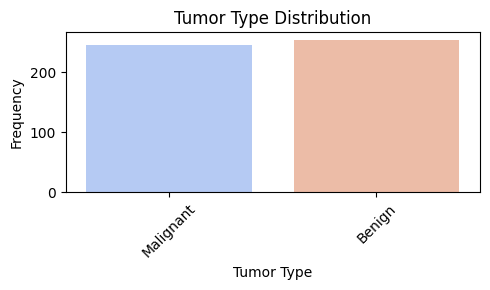

In [10]:
# Plot tumor type distribution
plt.figure(figsize = (5, 3))
sns.countplot(data = df, x = 'Tumor_Type', palette = 'coolwarm')
plt.title("Tumor Type Distribution")
plt.xlabel('Tumor Type')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

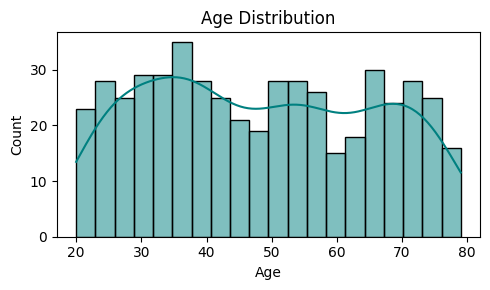

In [11]:
# Plot the distribution of age
plt.figure(figsize = (5, 3))
sns.histplot(df['Age'], bins = 20, kde = True, color = 'teal')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

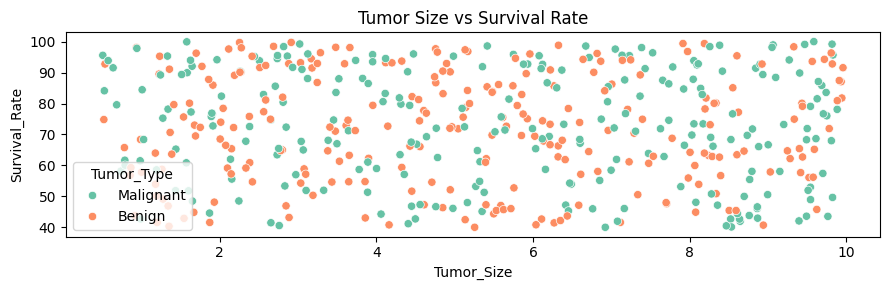

In [12]:
# Tumor Size vs Survival Rate
plt.figure(figsize = (9, 3))
sns.scatterplot(data = df, x = 'Tumor_Size', y = 'Survival_Rate', hue = 'Tumor_Type', palette = 'Set2')
plt.title('Tumor Size vs Survival Rate')
plt.tight_layout()
plt.show()

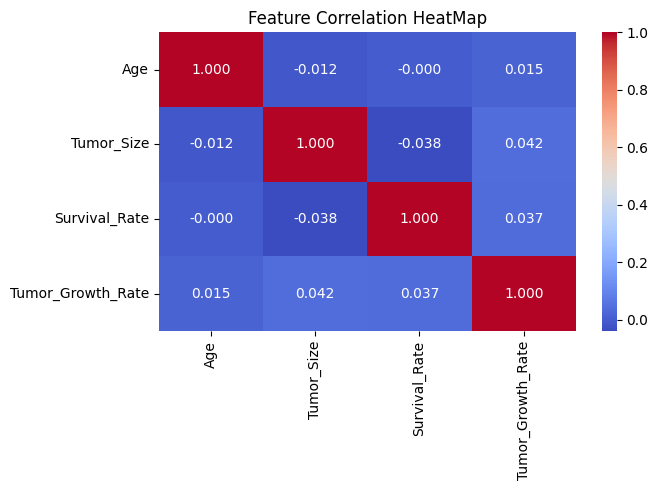

In [13]:
# Correlation Heatmap
plt.figure(figsize = (7, 5))
corr = df.select_dtypes(include = ['number']).corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.3f')
plt.title('Feature Correlation HeatMap')
plt.tight_layout()
plt.show()

In [14]:
# Label Encoding on Categorical Column
label_encoders = {}
for column in df.select_dtypes(include = ['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [15]:
# Getting input and output data
X = df.drop('Tumor_Type', axis = 1)
y = df['Tumor_Type']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [16]:
# Creating the RandomForestClassifier()
clf = RandomForestClassifier(random_state = 5)

# Fitting the data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [17]:
# Taking the predictions from the model
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [18]:
# Model Evaluation
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred), 3))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred), 3))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred), 3))

print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_test_pred), 3))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_test_pred), 3))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_test_pred), 3))

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.5
Testing Precision : 0.562
Testing Recall : 0.482
Testing F1 Score : 0.519


In [19]:
!C:\\Users\\gnikh\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\python.exe -m pip install xgboost


In [20]:
import sys
print(sys.executable)


C:\Users\gnikh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [21]:
# Creating the XGBoost()
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 5)

# Fitting the data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [22]:
# Taking the predictions from the model
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [23]:
# Model Evaluation
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred), 3))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred), 3))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred), 3))

print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_test_pred), 3))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_test_pred), 3))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_test_pred), 3))

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.42
Testing Precision : 0.48
Testing Recall : 0.429
Testing F1 Score : 0.453


In [24]:
'''
Even XGBoost Classifier is overfitting.

We can try to optimize the predictive performance of the model by the following methods ->
(1) Instead of Label Encoding, we can do One-Hot-Encoding / we can use replace() to manually replace the data
(2) We can do hyper-parameter optimization using GridSearchCV() / RandomizedSearchCV()
(3) After step 1, we can try to further do EDA and discard irrelevant data from the model
'''

'\nEven XGBoost Classifier is overfitting.\n\nWe can try to optimize the predictive performance of the model by the following methods ->\n(1) Instead of Label Encoding, we can do One-Hot-Encoding / we can use replace() to manually replace the data\n(2) We can do hyper-parameter optimization using GridSearchCV() / RandomizedSearchCV()\n(3) After step 1, we can try to further do EDA and discard irrelevant data from the model\n'

In [25]:
# Save the model (RandomForestClassifier())
with open('random_forest_classifier.pkl', 'wb') as file:
    pickle.dump(clf, file)